In [ ]:
# Quick Pipeline Test
import sys
import os
sys.path.append('../')

import pandas as pd
from src.utils.data_helpers import load_cleaned_data

print("Testing pipeline components...")

# Test 1: Load parquet data
try:
    df_raw = pd.read_parquet('../data/raw/iri_sales_data.parquet')
    print(f"[OK] Raw data loaded: {len(df_raw):,} rows, {len(df_raw.columns)} columns")
except Exception as e:
    print(f"[ERROR] Failed to load raw data: {e}")

# Test 2: Test utility function
try:
    df_clean = load_cleaned_data()
    print(f"[OK] Cleaned data loaded: {len(df_clean):,} rows")
except Exception as e:
    print(f"[INFO] Cleaned data not available (normal if cleaning hasn't run): {e}")

print("\n[OK] Pipeline tests completed!")


# 🧪 Data Testing Playground

**Purpose**: Flexible testing environment for experimenting with ideas, visualizations, and code on the cleaned IRI sales data.

**Data**: Cleaned IRI sales data (1.9M+ records, 37 columns)

**Last Updated**: January 16, 2025

---

## 📋 Quick Reference

**Key Columns**:
- `quantity_sold` - Units sold per week
- `unit_price` - Price per unit ($)
- `revenue` - Total dollar sales
- `date` - Week ending date
- `product_name` - Product identifier
- `geography` - Geographic region

**Available Functions**: 31 utility functions across data_helpers, model_helpers, and plot_helpers modules


## 🔧 Setup & Data Loading


In [3]:
# Setup Python path to find project modules
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path().absolute().parent  # Go up one level from notebooks/ to project root
sys.path.insert(0, str(project_root))

print(f"📁 Project root: {project_root}")
print(f"🐍 Python path updated")

# Core imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Utility function imports
from src.utils.data_helpers import (
    load_cleaned_data, 
    get_cleaned_data_summary,
    create_time_features,
    create_lag_features,
    create_rolling_features
)

from src.utils.plot_helpers import (
    setup_plot_style,
    plot_time_series,
    plot_price_quantity_scatter,
    plot_correlation_heatmap,
    plot_distribution,
    plot_boxplot_by_category
)

from src.utils.model_helpers import (
    calculate_price_elasticity,
    prepare_features_for_modeling,
    train_multiple_models,
    predict_demand_change,
    optimize_price_for_revenue
)

print("✅ All imports successful!")


📁 Project root: c:\Users\adaves\OneDrive - Thai Union Group\Documents\elasticity
🐍 Python path updated
✅ All imports successful!


In [4]:
# Setup plotting style
setup_plot_style(figsize=(12, 8), dpi=100)
plt.style.use('default')
sns.set_palette("husl")

print("🎨 Plotting style configured!")


🎨 Plotting style configured!


In [5]:
# Load cleaned data
print("📊 Loading cleaned IRI sales data...")
df = load_cleaned_data()

print(f"✅ Data loaded successfully!")
print(f"📏 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")


📊 Loading cleaned IRI sales data...


INFO:src.utils.data_helpers:Loaded cleaned data: 1905890 rows, 37 columns from C:\Users\adaves\OneDrive - Thai Union Group\Documents\elasticity\data\processed\iri_sales_data_clean.parquet


✅ Data loaded successfully!
📏 Shape: 1,905,890 rows × 37 columns
💾 Memory usage: 814.8 MB


In [6]:
# Get data summary
summary = get_cleaned_data_summary(df)

print("📋 DATA SUMMARY")
print("=" * 50)
print(f"📅 Date Range: {summary['date_range']['start']} to {summary['date_range']['end']}")
print(f"📆 Total Weeks: {summary['date_range']['total_weeks']}")
print(f"🌍 Geographic Regions: {summary['geographic_coverage']['regions']}")
print(f"🏷️ Unique Products: {summary['product_coverage']['products']}")
print(f"💰 Total Revenue: ${summary['sales_metrics']['total_revenue']:,.0f}")
print(f"📦 Total Quantity: {summary['sales_metrics']['total_quantity']:,.0f} units")
print(f"💵 Avg Unit Price: ${summary['sales_metrics']['avg_unit_price']:.2f}")
print(f"💵 Price Range: ${summary['sales_metrics']['price_range']['min']:.2f} - ${summary['sales_metrics']['price_range']['max']:.2f}")


📋 DATA SUMMARY
📅 Date Range: 2022-01-02 00:00:00 to 2025-06-08 00:00:00
📆 Total Weeks: 180
🌍 Geographic Regions: 86
🏷️ Unique Products: 3575
💰 Total Revenue: $17,198,008,051
📦 Total Quantity: 5,517,501,463 units
💵 Avg Unit Price: $3.93
💵 Price Range: $0.89 - $17.82


In [7]:
# Quick data preview
print("👀 DATA PREVIEW")
print("=" * 50)
display(df.head())

print("\n📊 COLUMN INFO")
print("=" * 50)
display(df.info())


👀 DATA PREVIEW


,ID,geography,product_name,time_original,Geography Key,Product Key,quantity_sold,Unit Sales Year Ago,Unit Sales 2 Years Ago,Unit Sales 3 Years Ago,...,Dollar Sales 2 Years Ago,Dollar Sales 3 Years Ago,Incremental Dollars,Base Dollar Sales,Unit Sales per Pt of Distribution,Weighted Average Base Price Per Unit,Opportunity Dollars,Dollar Trade Efficiency,Unit Trade Efficiency,date
0,10147576,Total US - Multi Outlet,ACE OF DIAMONDS CHUNK LIGHT WATER 5 OZ 1 CT CA...,Week Ending 12-31-23,609857.0,452471233:225241880:59659909:460977384:7080095...,64.0,13.0,165.0,1132.0,...,186.0,937.0,0.0,106.0,970.0,1.67,270117.0,NaN,NaN,2023-12-31
1,10147577,Total US - Multi Outlet,ACE OF DIAMONDS CHUNK LIGHT WATER 5 OZ 1 CT CA...,Week Ending 01-07-24,609857.0,452471233:225241880:59659909:460977384:7080095...,20.0,21.0,185.0,1816.0,...,170.0,1534.0,0.0,32.0,527.0,1.62,152402.0,NaN,NaN,2024-01-07
2,10147578,Total US - Multi Outlet,CHICKEN OF THE SEA CHUNK LIGHT OIL 12 OZ 1 CT ...,Week Ending 12-31-23,609857.0,452471233:225241880:59659909:460977384:7080095...,8431.0,12740.0,16067.0,22362.0,...,39876.0,57626.0,53.0,24969.0,424.0,2.97,237774.0,0.21,0.19,2023-12-31
3,10147579,Total US - Multi Outlet,CHICKEN OF THE SEA CHUNK LIGHT OIL 12 OZ 1 CT ...,Week Ending 01-07-24,609857.0,452471233:225241880:59659909:460977384:7080095...,13247.0,16638.0,19656.0,29992.0,...,48848.0,74517.0,235.0,39360.0,547.0,2.99,320249.0,0.59,0.66,2024-01-07
4,10147580,Total US - Multi Outlet,CHICKEN OF THE SEA CHUNK LIGHT OIL 5 OZ 1 CT C...,Week Ending 12-31-23,609857.0,452471233:225241880:59659909:460977384:7080095...,70809.0,138071.0,175360.0,179849.0,...,183822.0,177596.0,2081.0,91687.0,990.0,1.34,182682.0,2.22,3.06,2023-12-31



📊 COLUMN INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905890 entries, 0 to 1905889
Data columns (total 37 columns):
 #   Column                                           Dtype         
---  ------                                           -----         
 0   ID                                               int64         
 1   geography                                        category      
 2   product_name                                     category      
 3   time_original                                    object        
 4   Geography Key                                    float64       
 5   Product Key                                      object        
 6   quantity_sold                                    float64       
 7   Unit Sales Year Ago                              float64       
 8   Unit Sales 2 Years Ago                           float64       
 9   Unit Sales 3 Years Ago                           float64       
 10  Base Unit Sales                        

None

## 🔍 Quick Data Exploration


In [8]:
# Basic statistics
key_cols = ['quantity_sold', 'unit_price', 'revenue', 'volume']
print("📈 KEY METRICS SUMMARY")
print("=" * 50)
display(df[key_cols].describe())


📈 KEY METRICS SUMMARY


,quantity_sold,unit_price,revenue,volume
count,1.905890e+06,1.905890e+06,1.905890e+06,1.905890e+06
mean,2.894974e+03,3.925450e+00,9.023610e+03,2.760505e+04
std,1.001557e+04,3.072614e+00,5.048796e+04,2.042930e+05
min,1.000000e+00,8.900000e-01,0.000000e+00,0.000000e+00
25%,3.700000e+01,1.980000e+00,1.350000e+02,2.040000e+02
50%,2.240000e+02,2.990000e+00,7.150000e+02,1.222000e+03
75%,1.067000e+03,4.640000e+00,2.879000e+03,6.350000e+03
max,7.553511e+04,1.782000e+01,5.525620e+06,2.869632e+07


In [9]:
# Sample some products and regions for quick exploration
print("🏷️ SAMPLE PRODUCTS (Top 10 by revenue)")
print("=" * 50)
top_products = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10)
display(top_products)

print("\n🌍 SAMPLE REGIONS (Top 10 by revenue)")
print("=" * 50)
top_regions = df.groupby('geography')['revenue'].sum().sort_values(ascending=False).head(10)
display(top_regions)


🏷️ SAMPLE PRODUCTS (Top 10 by revenue)


product_name
STARKIST CHUNK LIGHT WATER 5 OZ 1 CT CAN REGULAR - 00018000000673              519504462.0
BUMBLE BEE SOLID WHITE WATER 5 OZ 1 CT CAN REGULAR - 00028660000005            512931904.0
STARKIST CHUNK LIGHT WATER 2.6 OZ 1 CT POUCH REGULAR - 00018000049524          312112800.0
STARKIST SOLID WHITE WATER 5 OZ 1 CT CAN REGULAR - 00028000000672              282508512.0
STARKIST CHUNK LIGHT WATER 12 OZ 1 CT CAN REGULAR - 00018000000334             268890610.0
STARKIST CHUNK LIGHT WATER 60 OZ 12 CT CAN REGULAR - 00018000051596            260645920.0
STARKIST SOLID WHITE WATER 12 OZ 1 CT CAN REGULAR - 00018000000145             256875900.0
BUMBLE BEE SOLID WHITE WATER 12 OZ 1 CT CAN REGULAR - 00018660000001           248814408.0
CHICKEN OF THE SEA CHUNK LIGHT WATER 5 OZ 1 CT CAN REGULAR - 00014800000245    246385827.0
SEASON SARDINES OIL 4.375 OZ 1 CT CAN REGULAR - 00017030302216                 204188054.0
Name: revenue, dtype: float64


🌍 SAMPLE REGIONS (Top 10 by revenue)


geography
Total US - Multi Outlet+               9.301364e+09
Total US - Food                        2.373303e+09
Total US - Multi Outlet                1.084153e+09
WALMART CORP                           8.779816e+08
KROGER CORP                            3.521254e+08
ABSCO CORP                             2.098268e+08
Northeast - Standard - Multi Outlet    2.041777e+08
PUBLIX CORP                            1.747209e+08
Southeast - Standard - Multi Outlet    1.588385e+08
UNFI SV TTL ENTERPRISE SRMA            1.560398e+08
Name: revenue, dtype: float64

## 📊 Quick Visualizations


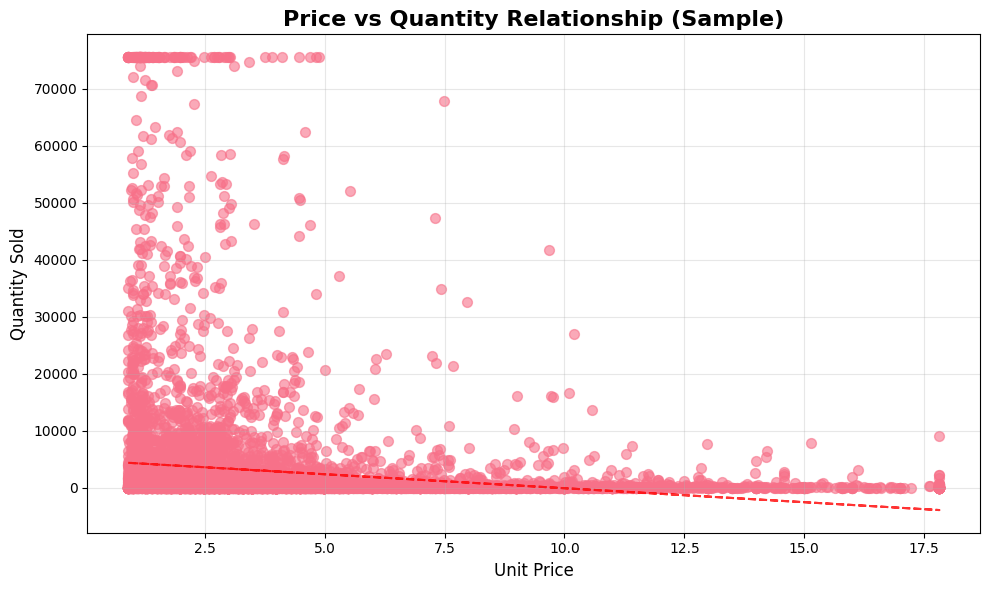

In [10]:
# Price vs Quantity scatter plot
# Sample data for faster plotting
df_sample = df.sample(n=min(10000, len(df)), random_state=42)

fig = plot_price_quantity_scatter(
    df_sample, 
    title="Price vs Quantity Relationship (Sample)",
    figsize=(10, 6)
)
plt.show()


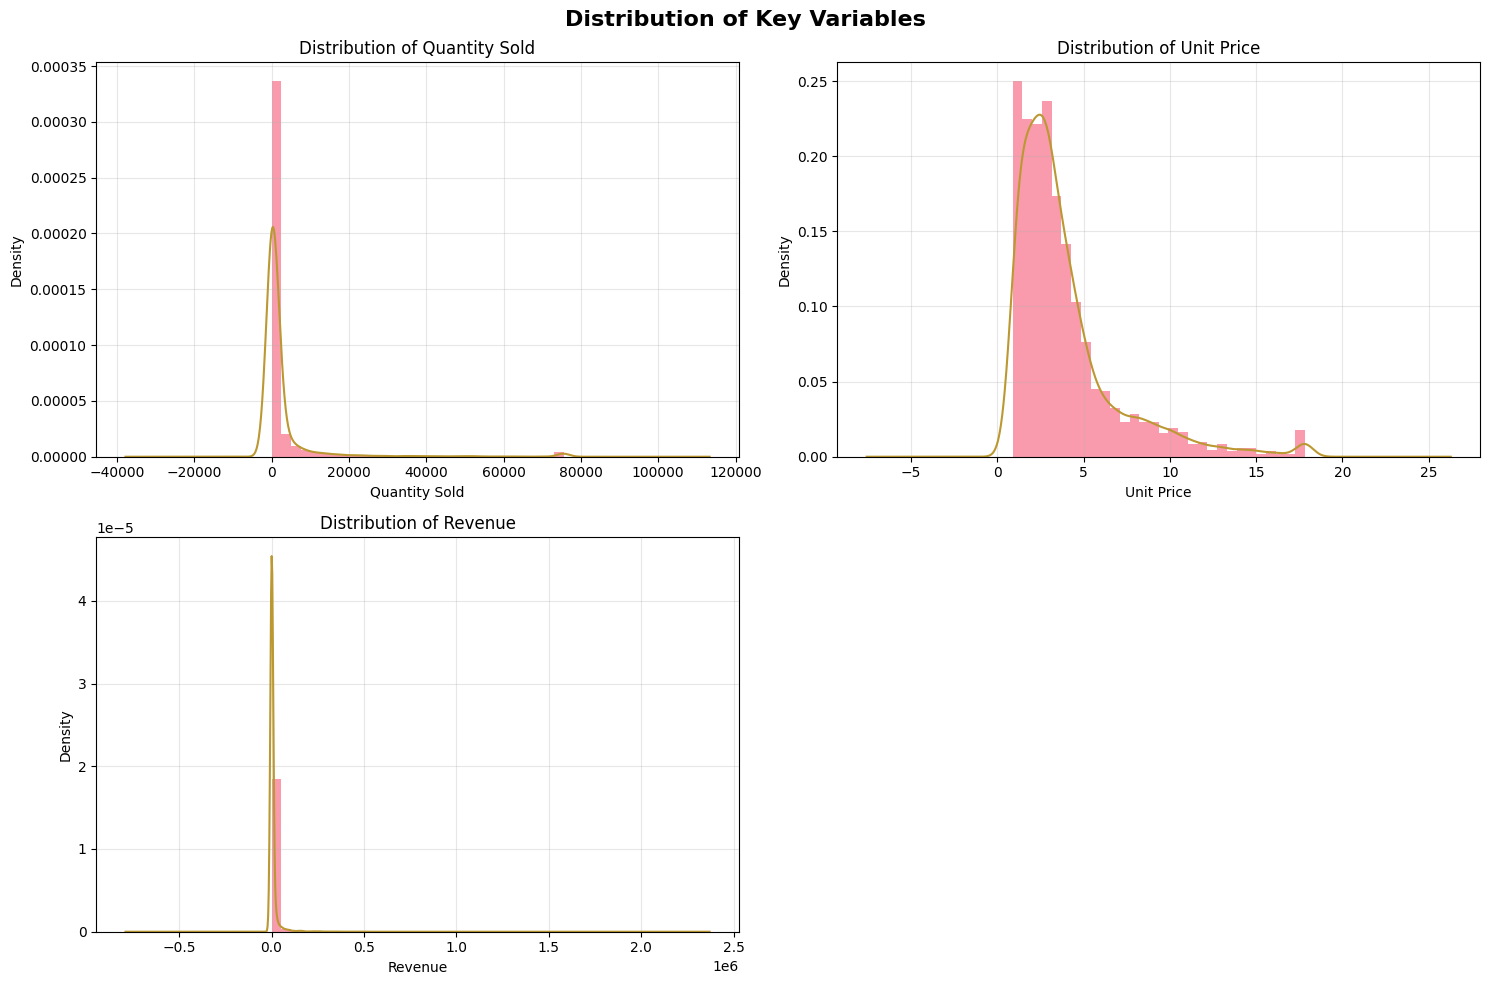

In [11]:
# Distribution plots for key variables
fig = plot_distribution(
    df_sample, 
    columns=['quantity_sold', 'unit_price', 'revenue'], 
    title="Distribution of Key Variables",
    figsize=(15, 10)
)
plt.show()


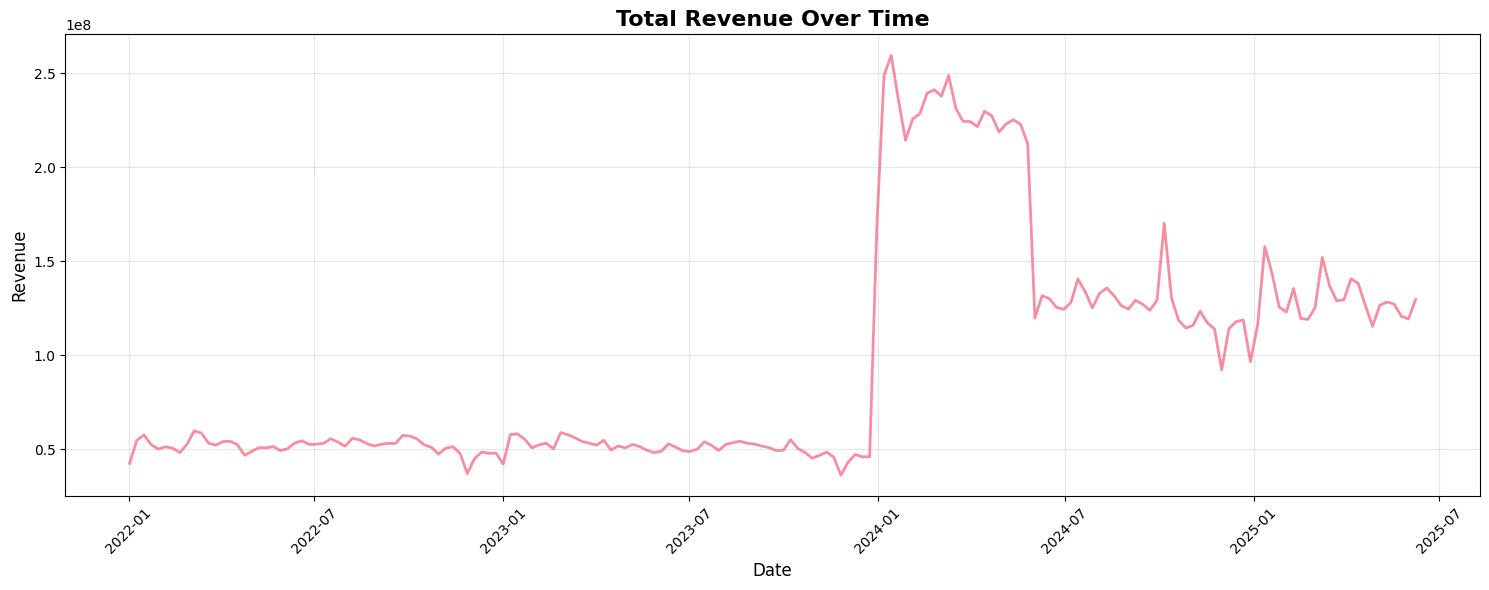

In [12]:
# Time series of aggregated metrics
df_temporal = df.groupby('date').agg({
    'quantity_sold': 'sum',
    'revenue': 'sum',
    'unit_price': 'mean'
}).reset_index()

fig = plot_time_series(
    df_temporal, 
    date_column='date', 
    value_column='revenue',
    title="Total Revenue Over Time",
    figsize=(15, 6)
)
plt.show()


### 💡 Idea Testing Cell 1


In [13]:
# Test your ideas here!
# Example: Explore price elasticity for a specific product

# Get top product
top_product = df.groupby('product_name')['revenue'].sum().idxmax()
print(f"Testing elasticity for: {top_product}")

# Filter data for this product
product_data = df[df['product_name'] == top_product].copy()

print(f"Data points: {len(product_data)}")
print(f"Price range: ${product_data['unit_price'].min():.2f} - ${product_data['unit_price'].max():.2f}")
print(f"Quantity range: {product_data['quantity_sold'].min():,.0f} - {product_data['quantity_sold'].max():,.0f}")


Testing elasticity for: STARKIST CHUNK LIGHT WATER 5 OZ 1 CT CAN REGULAR - 00018000000673
Data points: 5136
Price range: $0.89 - $2.01
Quantity range: 1 - 75,535


### 📈 Visualization Testing Cell 2


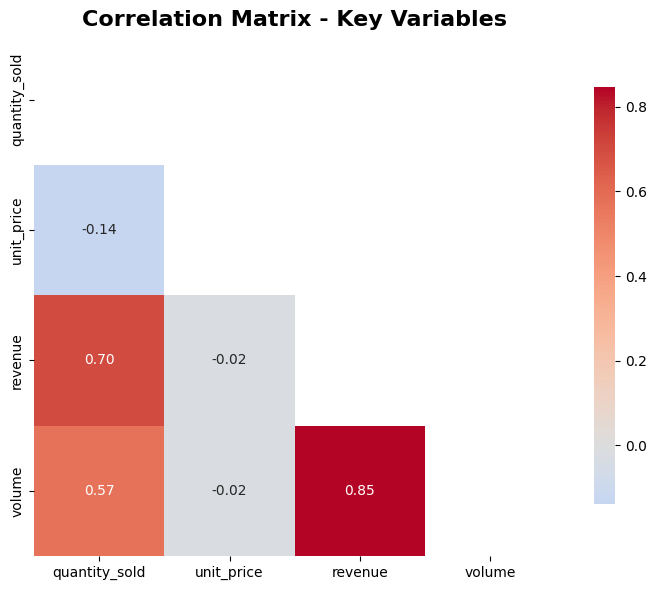

In [14]:
# Test custom visualizations here!
# Example: Create a correlation heatmap

numeric_cols = ['quantity_sold', 'unit_price', 'revenue', 'volume']
fig = plot_correlation_heatmap(
    df[numeric_cols],
    title="Correlation Matrix - Key Variables",
    figsize=(8, 6)
)
plt.show()


### 🎯 Model Testing Cell 3


In [15]:
# Test modeling approaches here!
# Example: Quick elasticity calculation

# Calculate elasticity for top 5 products
top_5_products = df.groupby('product_name')['revenue'].sum().nlargest(5).index
df_top5 = df[df['product_name'].isin(top_5_products)]

elasticity_results = calculate_price_elasticity(
    df_top5, 
    group_column='product_name'
)

print("🎯 PRICE ELASTICITY RESULTS (Top 5 Products)")
print("=" * 50)
display(elasticity_results.round(3))


🎯 PRICE ELASTICITY RESULTS (Top 5 Products)


,price_elasticity,r_squared,observations,mean_price,mean_quantity,group
0,-5.377,0.202,4827,3.350,9152.453,STARKIST CHUNK LIGHT WATER 12 OZ 1 CT CAN REGU...
1,-4.400,0.251,5136,1.242,18694.815,STARKIST CHUNK LIGHT WATER 5 OZ 1 CT CAN REGUL...
2,-3.395,0.248,5129,1.461,13989.031,STARKIST CHUNK LIGHT WATER 2.6 OZ 1 CT POUCH R...
3,-4.295,0.267,5080,1.989,11671.721,STARKIST SOLID WHITE WATER 5 OZ 1 CT CAN REGUL...
4,-5.157,0.327,5043,2.252,12266.190,BUMBLE BEE SOLID WHITE WATER 5 OZ 1 CT CAN REG...


### 🔬 Data Analysis Cell 4


INFO:src.utils.data_helpers:Time features created successfully


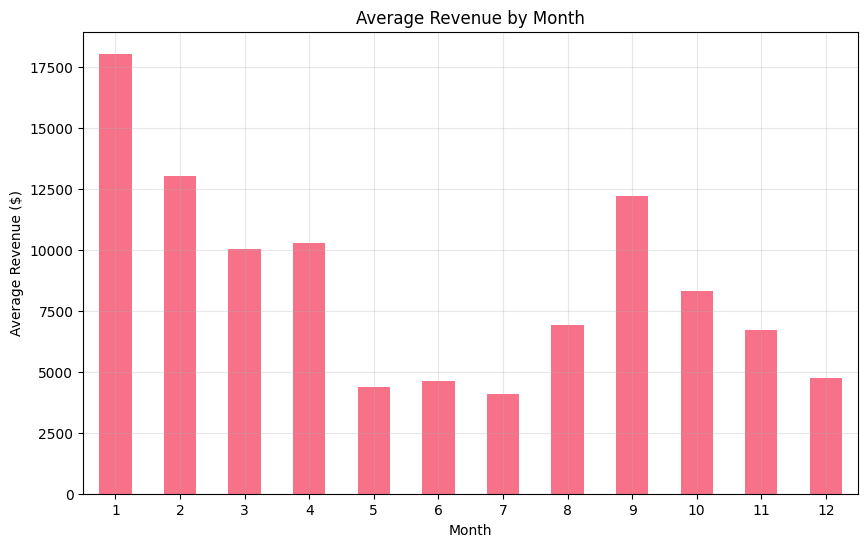

📅 Monthly Revenue Summary:


month
1     18054.57
2     13042.29
3     10054.46
4     10292.18
5      4373.23
6      4609.24
7      4092.38
8      6913.03
9     12209.38
10     8323.88
11     6737.08
12     4743.65
Name: revenue, dtype: float64

In [16]:
# Test data analysis techniques here!
# Example: Seasonal analysis

# Add time features
df_time = create_time_features(df.sample(1000), date_column='date')  # Sample for speed

# Analyze by month
monthly_sales = df_time.groupby('month')['revenue'].mean()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Average Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue ($)')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

print("📅 Monthly Revenue Summary:")
display(monthly_sales.round(2))


### 🚀 Advanced Testing Cell 5


In [19]:
# Test advanced techniques here!
# Example: Price optimization simulation

# Simulate demand change for 10% price increase
elasticity = -1.5  # Example elasticity coefficient
current_demand = 1000  # Example current demand
price_change = 10  # 10% price increase

simulation = predict_demand_change(
    elasticity=elasticity,
    price_change_pct=price_change,
    current_demand=current_demand
)

print(f"💰 DEMAND SIMULATION RESULTS")
print("=" * 40)
print(f"Elasticity coefficient: {elasticity}")
print(f"Price change: +{price_change}%")
print(f"Predicted demand change: {simulation['demand_change_pct']:.1f}%")
print(f"New demand: {simulation['new_demand']:.0f} units")
print(f"Demand difference: {simulation['demand_difference']:.0f} units")

# Calculate revenue impact manually
current_price = 10  # Example price
current_revenue = current_price * current_demand
new_revenue = current_price * 1.10 * simulation['new_demand']  # 10% price increase
revenue_change_pct = (new_revenue / current_revenue - 1) * 100

print(f"\n💵 REVENUE IMPACT (Manual Calculation)")
print("=" * 40)
print(f"Current revenue: ${current_revenue:,.0f}")
print(f"New revenue: ${new_revenue:,.0f}")
print(f"Revenue change: {revenue_change_pct:.1f}%")

# Alternative: Use optimize_price_for_revenue for full revenue analysis
print(f"\n🎯 PRICE OPTIMIZATION ANALYSIS")
print("=" * 40)
optimization = optimize_price_for_revenue(
    elasticity=elasticity,
    current_price=current_price,
    current_demand=current_demand
)

print(f"Optimal price: ${optimization['optimal_price']:.2f}")
print(f"Optimal price change: {optimization['price_change_pct']:.1f}%")
print(f"Revenue at optimal price: ${optimization['optimal_revenue']:,.0f}")
print(f"Revenue improvement: {optimization['revenue_change_pct']:.1f}%")


💰 DEMAND SIMULATION RESULTS
Elasticity coefficient: -1.5
Price change: +10%
Predicted demand change: -15.0%
New demand: 850 units
Demand difference: -150 units

💵 REVENUE IMPACT (Manual Calculation)
Current revenue: $10,000
New revenue: $9,350
Revenue change: -6.5%

🎯 PRICE OPTIMIZATION ANALYSIS
Optimal price: $20.00
Optimal price change: 100.0%
Revenue at optimal price: $-10,000
Revenue improvement: -200.0%


### 🎨 Custom Visualization Cell 6


In [20]:
# Create your own custom visualizations here!
# Empty cell ready for your experiments

pass


### 🧮 Quick Analysis Cell 7


In [21]:
# Quick analysis and calculations here!
# Empty cell ready for your experiments

pass


### 🔍 Data Exploration Cell 8


In [22]:
# Explore specific aspects of the data here!
# Empty cell ready for your experiments

pass


## 📚 Quick Reference - Available Functions

### 📊 Data Functions
- `load_cleaned_data()` - Load the cleaned dataset
- `get_cleaned_data_summary(df)` - Get data summary statistics
- `create_time_features(df)` - Add time-based features
- `create_lag_features(df, columns, lags)` - Create lagged variables
- `create_rolling_features(df, columns, windows)` - Create rolling statistics

### 📈 Plotting Functions
- `plot_time_series(df, date_col, value_col)` - Time series plots
- `plot_price_quantity_scatter(df)` - Price vs quantity scatter
- `plot_correlation_heatmap(df)` - Correlation matrix
- `plot_distribution(df, columns)` - Distribution plots
- `plot_boxplot_by_category(df, cat_col, val_col)` - Categorical boxplots

### 🎯 Modeling Functions
- `calculate_price_elasticity(df, group_col=None)` - Calculate elasticity
- `prepare_features_for_modeling(df, target, features)` - Prepare model data
- `train_multiple_models(X, y)` - Compare multiple models
- `predict_demand_change(elasticity, price_change, demand)` - Simulate demand
- `optimize_price_for_revenue(elasticity, price, demand)` - Find optimal price

### 📋 Key Columns
- `quantity_sold` - Units sold per week
- `unit_price` - Price per unit ($)
- `revenue` - Total dollar sales
- `date` - Week ending date
- `product_name` - Product identifier
- `geography` - Geographic region
- `volume` - Physical volume measure
